In [433]:
import yfinance as yf
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [434]:
# Membaca data dari file CSV
data = pd.read_csv('dpdn.csv')

# Menampilkan baris terakhir dari data
data.head()

,No,Wilayah,Total jml,Total L,Total P,TK jml,TK L,TK P,KB jml,KB L,...,SMP P,SMA jml,SMA L,SMA P,SMK jml,SMK L,SMK P,SLB jml,SLB L,SLB P
0,1,Prov. Jawa Barat,9.483.667,4.904.905,4.578.762,365.538,188.160,177.378,360.743,184.097,...,876.090,817.919,358.572,459.347,1.052.991,595.489,457.502,28.523,17.291,11.232
1,2,Prov. Jawa Timur,6.454.517,3.364.480,3.090.037,748.898,385.706,363.192,326.813,166.908,...,582.027,544.357,238.200,306.157,765.554,451.671,313.883,22.147,13.460,8.687
2,3,Prov. Jawa Tengah,6.114.994,3.162.810,2.952.184,558.475,289.193,269.282,264.294,135.771,...,585.178,450.999,181.017,269.982,797.287,457.940,339.347,20.840,12.438,8.402
3,4,Prov. Sumatera Utara,3.068.710,1.583.971,1.484.739,111.561,57.513,54.048,84.863,43.326,...,301.261,385.462,173.180,212.282,295.928,169.366,126.562,5.722,3.464,2.258
4,5,Prov. Banten,2.406.372,1.247.015,1.159.357,100.875,51.488,49.387,102.911,51.882,...,212.032,223.876,102.001,121.875,247.608,138.425,109.183,6.683,4.204,2.479


In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         39 non-null     int64  
 1   Wilayah    39 non-null     object 
 2   Total jml  39 non-null     object 
 3   Total L    39 non-null     object 
 4   Total P    39 non-null     object 
 5   TK jml     39 non-null     float64
 6   TK L       39 non-null     float64
 7   TK P       39 non-null     float64
 8   KB jml     39 non-null     float64
 9   KB L       39 non-null     float64
 10  KB P       39 non-null     float64
 11  TPA jml    39 non-null     float64
 12  TPA L      39 non-null     float64
 13  TPA P      39 non-null     float64
 14  SPS jml    39 non-null     float64
 15  SPS L      39 non-null     float64
 16  SPS P      39 non-null     float64
 17  PKBM jml   39 non-null     float64
 18  PKBM L     39 non-null     float64
 19  PKBM P     39 non-null     float64
 20  SKB jml    3

In [436]:
data.isnull()

,No,Wilayah,Total jml,Total L,Total P,TK jml,TK L,TK P,KB jml,KB L,...,SMP P,SMA jml,SMA L,SMA P,SMK jml,SMK L,SMK P,SLB jml,SLB L,SLB P
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [437]:
kolom_numerik = ['Total jml', 'Total L', 'Total P', 'SD jml', 'SD L', 'SD P']

# # Mengubah data string menjadi numerik
# for kolom in kolom_numerik:
#     data[kolom] = pd.to_numeric(data[kolom])
    

# Menghapus titik pemisah ribuan dan mengubah data string menjadi numerik
for kolom in kolom_numerik:
    data[kolom] = pd.to_numeric(data[kolom].str.replace('.', ''))


## 1. Time Series Plot

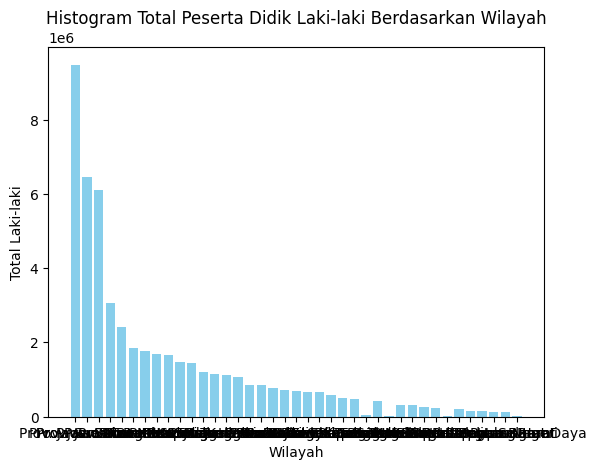

In [438]:
import matplotlib.pyplot as plt

series = data["Total jml"]
wilayah=data["Wilayah"]
# Plot histogram
plt.bar(wilayah, series, color='skyblue')

# Tambahkan label dan judul
plt.xlabel('Wilayah')
plt.ylabel('Total Laki-laki')
plt.title('Histogram Total Peserta Didik Laki-laki Berdasarkan Wilayah')

# Tampilkan plot
plt.show()


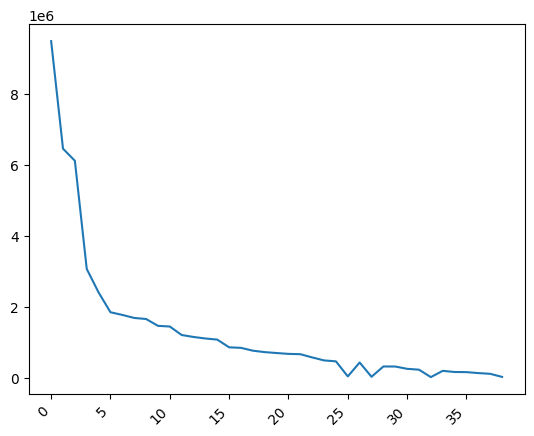

In [439]:
plt.plot(data.index, series)
plt.xticks(rotation=45, ha='right')
plt.show()

## 2. Stationarity

ACF and PACF assume stationarity of the underlying time series. <br>
Stationarity can be checked by performing an Augmented Dickey-Fuller (ADF) test:

> p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.<br>
> p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [440]:
adfuller(series)[0:2]

(-7.620169566943991, 2.138885340893453e-11)

pvalue= 2.138885340893453e-11

hasil data diatas sudah signifikan karena nilai pvalue lebih kecil dari alpha, jadi tidak perlu di differencing

## 3. ACF and PACF

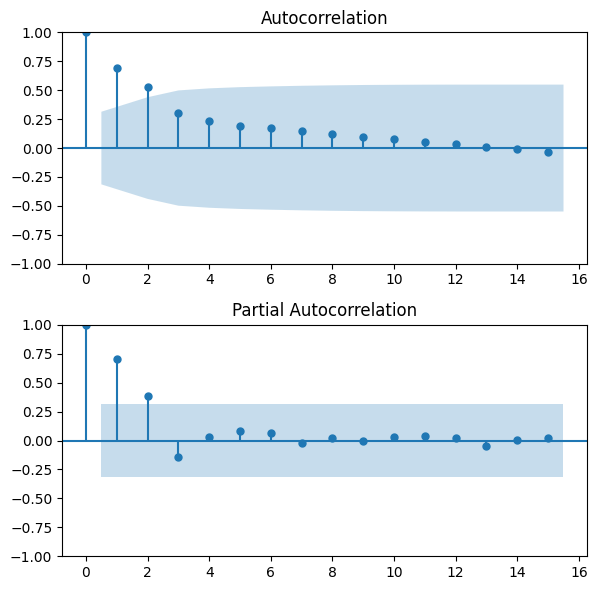

In [441]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,6))
plot_acf(series,lags=15, ax=ax[0])
plot_pacf(series,lags=15, ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

## 4. ARIMA model

In [442]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(1,0,1)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:              Total jml   No. Observations:                   39
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -640.641
Date:                Sun, 31 Mar 2024   AIC                           1289.282
Time:                        11:16:38   BIC                           1295.936
Sample:                             0   HQIC                          1291.669
                                 - 39                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.314e+06   7.29e-11    1.8e+16      0.000    1.31e+06    1.31e+06
ar.L1          0.9977      0.002    448.837      0.000       0.993       1.002
ma.L1          0.1240      0.049      2.548      0.0

In [443]:
print(model.forecast())

39    22029.282717
dtype: float64


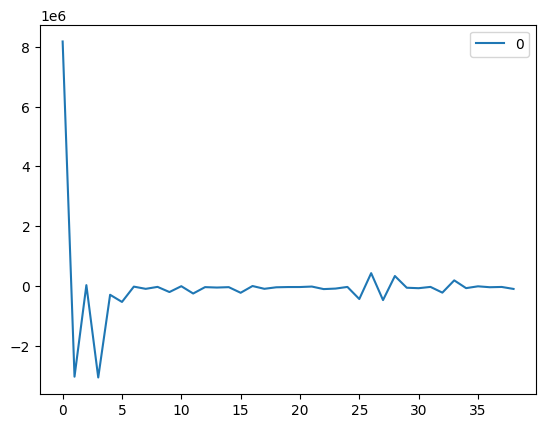

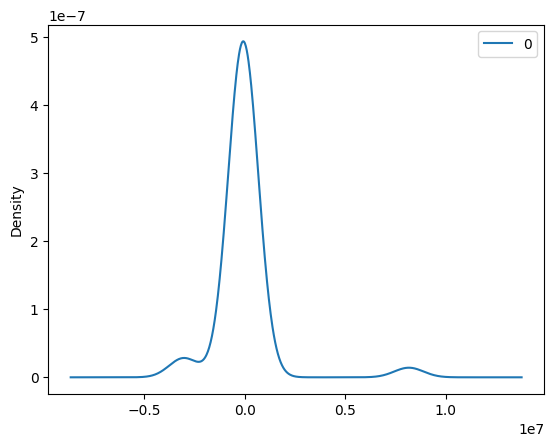

                  0
count  3.900000e+01
mean  -6.564021e+03
std    1.507908e+06
min   -3.040457e+06
25%   -1.409092e+05
50%   -3.151926e+04
75%   -1.352840e+04
max    8.169862e+06


In [444]:
# line plot of residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

## 5. Forecast

In [445]:
# Membaca data dari file CSV
data_fore = pd.read_csv('dpdn.csv')

# Menampilkan baris terakhir dari data
data_fore.head()

for kolom in kolom_numerik:
    data_fore[kolom] = pd.to_numeric(data_fore[kolom].str.replace('.', ''))

In [446]:
fore = data_fore['Total jml']

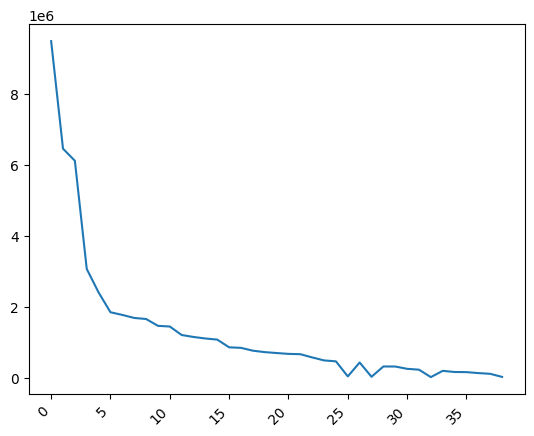

In [447]:
plt.plot(data_fore.index, fore)
plt.xticks(rotation=45, ha='right')
plt.show()

predicted=22029.282717, expected=9483667.000000
predicted=9712636.149112, expected=6454517.000000
predicted=6170754.553629, expected=6114994.000000
predicted=5704447.581475, expected=3068710.000000
predicted=3049487.857155, expected=2406372.000000
predicted=2335773.515692, expected=1849227.000000
predicted=1866781.421029, expected=1774256.000000
predicted=1782506.514302, expected=1688963.000000
predicted=1711841.581898, expected=1660049.000000
predicted=1685056.495019, expected=1466976.000000
predicted=1533900.353306, expected=1447961.000000
predicted=1509185.438426, expected=1209136.000000
predicted=1321560.519174, expected=1153472.000000
predicted=1265151.983262, expected=1110643.000000
predicted=1226088.278243, expected=1079238.000000
predicted=1196770.871353, expected=861943.000000
predicted=1023069.891088, expected=847196.000000
predicted=997609.485715, expected=767504.000000
predicted=930133.148778, expected=727035.000000
predicted=890496.406050, expected=701283.000000
predicted=

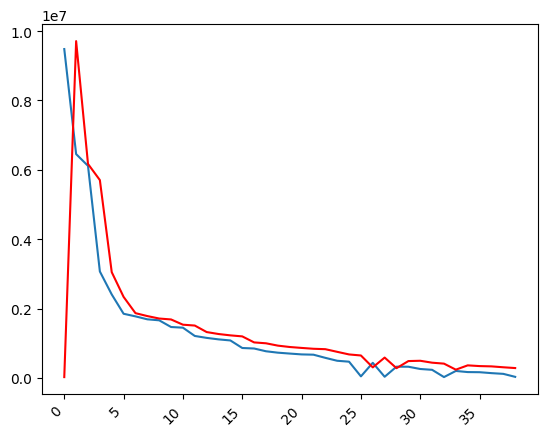

In [448]:
series_f = series
predictions = list()
# walk-forward validation
for t in range(len(fore)):
  model = ARIMA(series_f, order=(1,0,1)).fit()
  output = model.forecast()
  predictions.append(output)
  obs = fore[t]
  series_f = series_f.append(pd.Series([obs], index=[data_fore.index[t]]))
  print('predicted=%f, expected=%f' % (output, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(fore, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(data_fore.index, fore)
plt.plot(data_fore.index, predictions, color='red')
plt.xticks(rotation=45, ha='right')
plt.show()

# NN for Time Series

## 1. Time Series Plot

In [449]:
series = data["Total jml"]
length = series.shape[0]  # Mengakses panjang Series
length

39

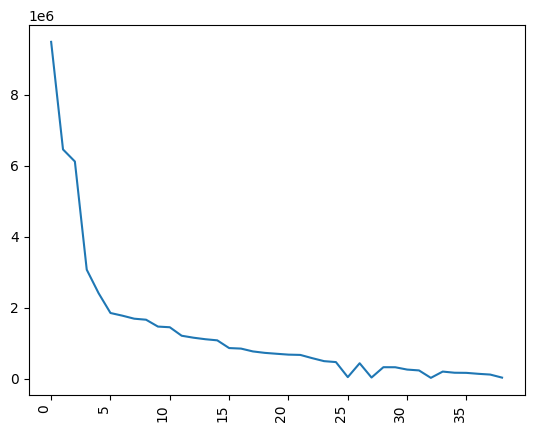

In [450]:
plt.plot(data.index, series)
plt.xticks(rotation=90, ha='right')
plt.show()

## 2. Train Val

<Axes: >

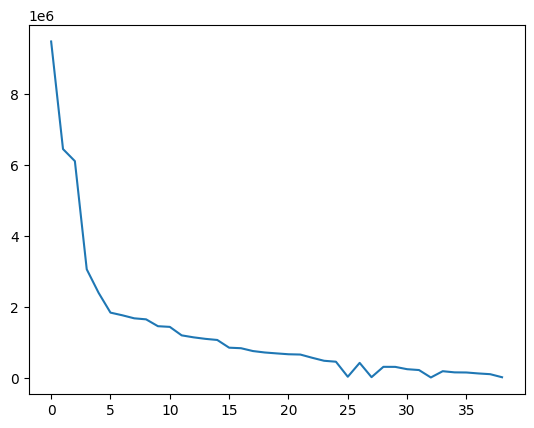

In [451]:
series.plot()

30 9


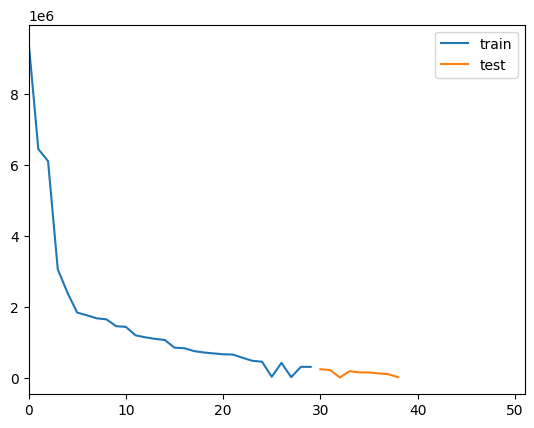

In [452]:
split_date = 30 #batasnya data ke berapa
df1 = series
train = df1.iloc[:split_date]
test = df1.iloc[split_date:]
plt.figure()
plt.xlim(0,51)
plt.plot(train)
plt.plot(test)
plt.legend(['train', 'test'])
print(len(train), len(test))

## 3. Lag for Input Variable

In [453]:
lag1 = series.shift(1)

In [454]:
lag1

0           NaN
1     9483667.0
2     6454517.0
3     6114994.0
4     3068710.0
5     2406372.0
6     1849227.0
7     1774256.0
8     1688963.0
9     1660049.0
10    1466976.0
11    1447961.0
12    1209136.0
13    1153472.0
14    1110643.0
15    1079238.0
16     861943.0
17     847196.0
18     767504.0
19     727035.0
20     701283.0
21     677065.0
22     668878.0
23     577759.0
24     493682.0
25     467165.0
26      43564.0
27     434364.0
28      32419.0
29     323025.0
30     321651.0
31     256429.0
32     232614.0
33      23218.0
34     199793.0
35     167317.0
36     163642.0
37     136901.0
38     115919.0
Name: Total jml, dtype: float64

In [455]:
lag2 = lag1.shift(1)
lag2

0           NaN
1           NaN
2     9483667.0
3     6454517.0
4     6114994.0
5     3068710.0
6     2406372.0
7     1849227.0
8     1774256.0
9     1688963.0
10    1660049.0
11    1466976.0
12    1447961.0
13    1209136.0
14    1153472.0
15    1110643.0
16    1079238.0
17     861943.0
18     847196.0
19     767504.0
20     727035.0
21     701283.0
22     677065.0
23     668878.0
24     577759.0
25     493682.0
26     467165.0
27      43564.0
28     434364.0
29      32419.0
30     323025.0
31     321651.0
32     256429.0
33     232614.0
34      23218.0
35     199793.0
36     167317.0
37     163642.0
38     136901.0
Name: Total jml, dtype: float64

In [456]:
nn_data = pd.DataFrame({'series':series, 'lag1':lag1, 'lag2':lag2})
nn_data

,series,lag1,lag2
0,9483667,NaN,NaN
1,6454517,9483667.0,NaN
2,6114994,6454517.0,9483667.0
3,3068710,6114994.0,6454517.0
4,2406372,3068710.0,6114994.0
5,1849227,2406372.0,3068710.0
6,1774256,1849227.0,2406372.0
7,1688963,1774256.0,1849227.0
8,1660049,1688963.0,1774256.0
9,1466976,1660049.0,1688963.0


In [457]:
nn_data = nn_data.dropna()

In [458]:
nn_data

,series,lag1,lag2
2,6114994,6454517.0,9483667.0
3,3068710,6114994.0,6454517.0
4,2406372,3068710.0,6114994.0
5,1849227,2406372.0,3068710.0
6,1774256,1849227.0,2406372.0
7,1688963,1774256.0,1849227.0
8,1660049,1688963.0,1774256.0
9,1466976,1660049.0,1688963.0
10,1447961,1466976.0,1660049.0
11,1209136,1447961.0,1466976.0


In [459]:
split_date = 30
train = nn_data.iloc[:split_date]
test = nn_data.iloc[split_date:]

from scipy.ndimage import shift
X_train = np.asarray(train[['lag1','lag2']])
y_train = np.asarray(train['series'])
X_train.shape, y_train.shape

((30, 2), (30,))

## 4. Modeling

In [460]:
from keras.models import Sequential
from keras.layers import Dense

nn_model = Sequential()
nn_model.add(Dense(12, input_dim=2, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100


30/30 [==============================] - 2s 3ms/step - loss: 1064390164480.0000
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 766487953408.0000
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 561091510272.0000
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 407815192576.0000
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 304202547200.0000
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 242202804224.0000
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 207505735680.0000
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 188253110272.0000
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 177338515456.0000
Epoch 10/100
30/30 [==============================] - 0s 4ms/step - loss: 170837573632.0000
Epoch 11/100
30/30 [==============================] - 0s 4ms/step - loss: 166656557056.0000
Epoch 12

## 5. Testing

In [461]:
from sklearn.metrics import r2_score

In [462]:
X_test = np.asarray(test[['lag1','lag2']])
y_test = np.asarray(test['series'])


y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

1/1 [==============================] - 0s 76ms/step
The R2 score on the Train set is:	0.898
The R2 score on the Test set is:	-0.549


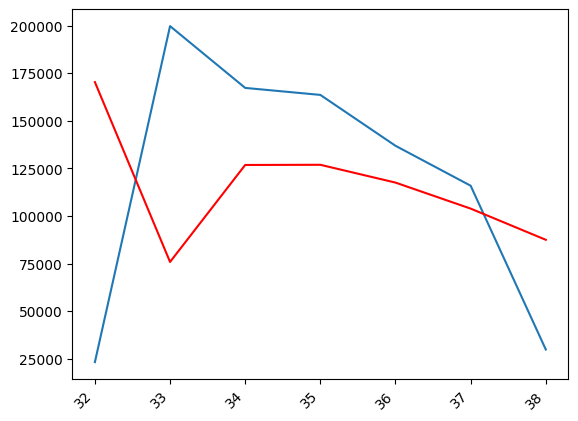

In [463]:
plt.plot(test.index, y_test)
plt.plot(test.index, y_pred_test_nn, color='red')
plt.xticks(rotation=45, ha='right')
plt.show()

## 6. Forecast

In [464]:
# Membaca data dari file CSV
data_fore = pd.read_csv('dpdn.csv')

# Menampilkan baris terakhir dari data
data_fore.head()

for kolom in kolom_numerik:
    data_fore[kolom] = pd.to_numeric(data_fore[kolom].str.replace('.', ''))

In [465]:
fore = data_fore['Total jml']

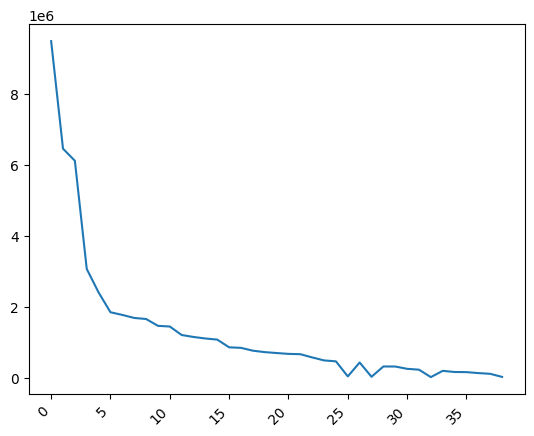

In [466]:
plt.plot(data_fore.index, fore)
plt.xticks(rotation=45, ha='right')
plt.show()

In [467]:
series_f = series
predictions = list()
# walk-forward validation
for t in range(len(fore)):
  model = Sequential([Dense(12, input_dim=2, activation='relu'),Dense(1)
])
  output = model.forecast()
  predictions.append(output)
  obs = fore[t]
  series_f = series_f.append(pd.Series([obs], index=[data_fore.index[t]]))
  print('predicted=%f, expected=%f' % (output, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(fore, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(data_fore.index, fore)
plt.plot(data_fore.index, predictions, color='red')
plt.xticks(rotation=45, ha='right')
plt.show()

AttributeError: 'Sequential' object has no attribute 'forecast'